## EJERCICIO 6 - PRACTICA 4

### Importo paquetes

In [59]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

### Importo datasets

## *Se edito el dataset. Agrege al csv el titulo de la primer columna "MATERIAL" , porque faltaba

In [ ]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes' # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/'  # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

### Datos de entrenamiento

In [63]:

nombre_archivo = DATOS_DIR + 'Segment_Train.csv' 

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df_train = pd.read_csv(nombre_archivo, encoding=result['encoding'])
print(df_train)

     MATERIAL  REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0       GRASS                110.0                189.0                   9   
1       GRASS                 86.0                187.0                   9   
2       GRASS                225.0                244.0                   9   
3       GRASS                 47.0                232.0                   9   
4       GRASS                 97.0                186.0                   9   
...       ...                  ...                  ...                 ...   
2095   CEMENT                 32.0                158.0                   9   
2096   CEMENT                  8.0                162.0                   9   
2097   CEMENT                128.0                161.0                   9   
2098   CEMENT                150.0                158.0                   9   
2099   CEMENT                124.0                162.0                   9   

      SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  V

### Le asigno un nombre a la primer columna (no tiene)

In [65]:
# Asignar un nombre temporal a la primera columna
#df_train.columns = ['Material-Imagen'] + df_train.columns[1:].tolist()

### Inspeccion rapida de los datos: analizo cuantos ejemplos hay de cada tipo de Clase

<Axes: >

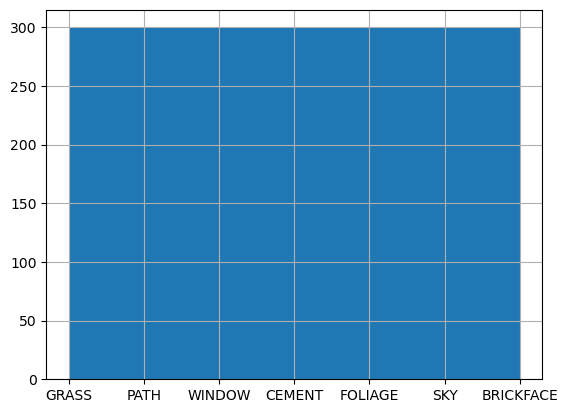

In [67]:
# Para hacer una inspección rápida de los datos
#print(df.head())
#print(df.describe())
df_train.iloc[:,0].hist(bins=7)


### Datos de testeo

In [69]:

nombre_archivo = DATOS_DIR + 'Segment_Test.csv' 

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df_test = pd.read_csv(nombre_archivo, encoding=result['encoding'])
print(df_test.columns)

Index(['MATERIAL', 'REGION-CENTROID-COL', 'REGION-CENTROID-ROW',
       'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2',
       'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN',
       'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN',
       'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN',
       'HUE-MEAN'],
      dtype='object')


### Consigna

### Entrenamiento (utilizo df_train)

In [72]:
# %% separa atributos y clases
X_train = np.array(df_train.iloc[:,1:])  # recupera todas las columnas salvo la primera 
Y_train = np.array(df_train.iloc[:,0])    # recupera solo la primer columna (valor a predecir)
print(df_train['MATERIAL'])

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_train_binarizado = binarizer.fit_transform(Y_train)
# Y_raw==pd.get_dummies(df[' Balance']).to_numpy() # forma alternativa para codificar

print('Las clases del dataset son :', binarizer.classes_)
print(Y_train_binarizado)
# Escala los atributos de los ejemplo
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()
X_train  = scaler.fit_transform( X_train )

################################################### En este caso no dividio el df en train y test porque tengo 2 dfs
# %% Separa ejemplos para enternamiento y testeo:
#TEST_SIZE = 0.30 # proporcion entre testeo entre entrenamiento y testeo (utiliza 30% de los datos para testeo y el otro 70% de los datos para entrenamiento)
# X_test e Y_test --> datos de testeo (x atributos, y valores a predecir) --> 30% del dataset
# X_train e Y_train --> datos de entrenamiento --> 70% del dataset

#X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)

#print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))


0        GRASS
1        GRASS
2        GRASS
3        GRASS
4        GRASS
         ...  
2095    CEMENT
2096    CEMENT
2097    CEMENT
2098    CEMENT
2099    CEMENT
Name: MATERIAL, Length: 2100, dtype: object
Las clases del dataset son : ['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [80]:
FunH = 'tanh'   # identity logistic tanh relu
ocultas = (8)

alfa = 0.005
CotaError = 1.0e-5
MAX_ITE = 100

modelo = MLPClassifier(max_iter=MAX_ITE, hidden_layer_sizes=ocultas, alpha=alfa,
                       solver='sgd', activation=FunH, tol=CotaError,
                       verbose=False)

modelo.out_activation_ = 'softmax'

modelo.fit(X_train, Y_train)

#  ########### Medición del entrenamiento ######################
# entrenamiento con X_train e Y_train (80% del dataset)
Y_pred = modelo.predict(X_train)
score = modelo.score(X_train, Y_train)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f%%' % (score) )


C:\Users\W10\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


AxisError: axis 1 is out of bounds for array of dimension 1

### Testeo (utilizo df_test)

In [ ]:
# %% separa atributos y clases
X_test = np.array(df_test.iloc[:,1:])  # recupera todas las columnas salvo la primera 
Y_test = np.array(df_test.iloc[:,0])    # recupera solo la primer columna (valor a predecir)

#  ########### Medición del testeo ######################
Y_pred = modelo.predict(X_test)
score = modelo.score(X_test, Y_test)

# "invierte" la transformacion binaria para obtener los nombres de las clases ---> no es necesario pq no binarice el df_test
Y_it = binarizer.inverse_transform(Y_test)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f%%' % (score) )